In [1]:
import numpy as np
import time
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics

import seaborn as sns
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.covariance import EmpiricalCovariance

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn import random_projection

from scipy.stats import kurtosis

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor

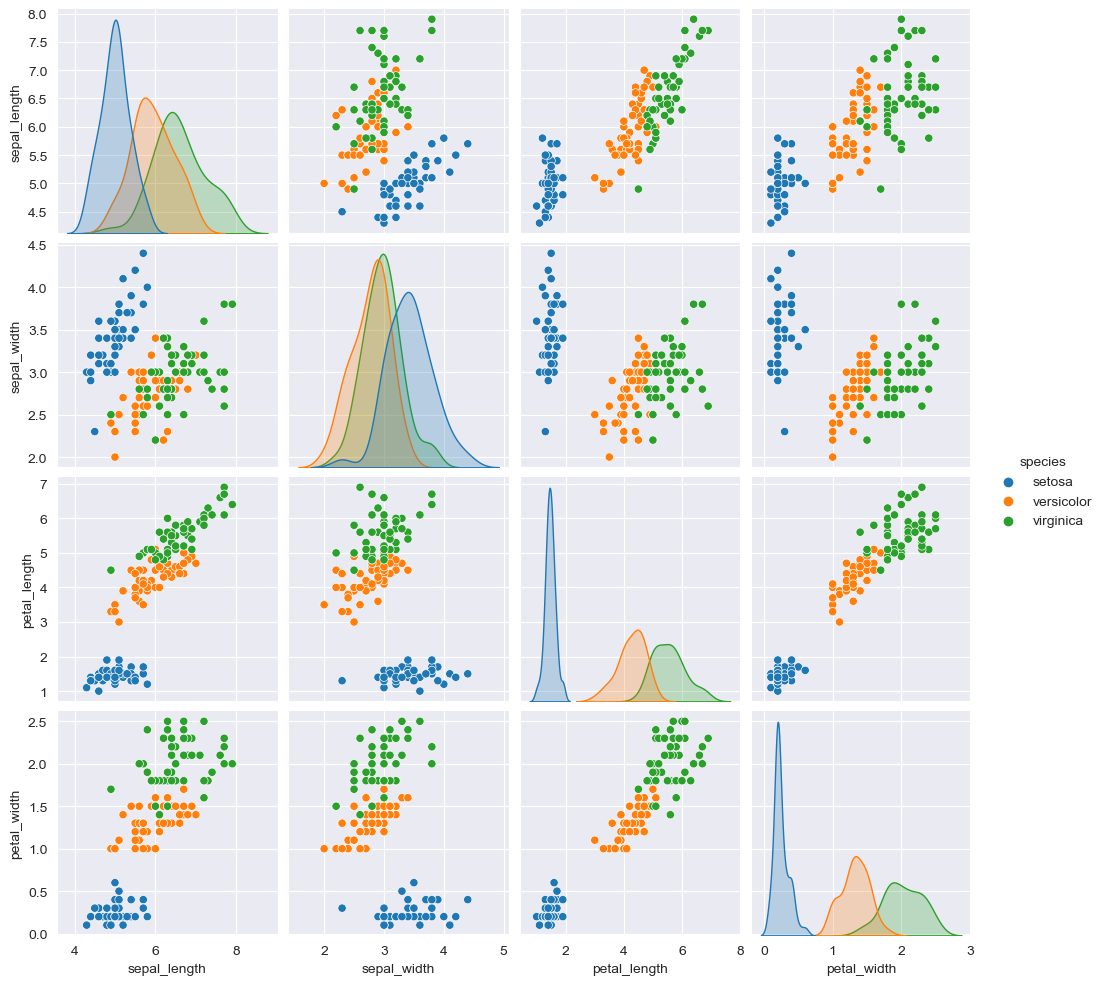

In [21]:
# pair plot iris ground truth
sns.set_style("darkgrid")
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue="species")

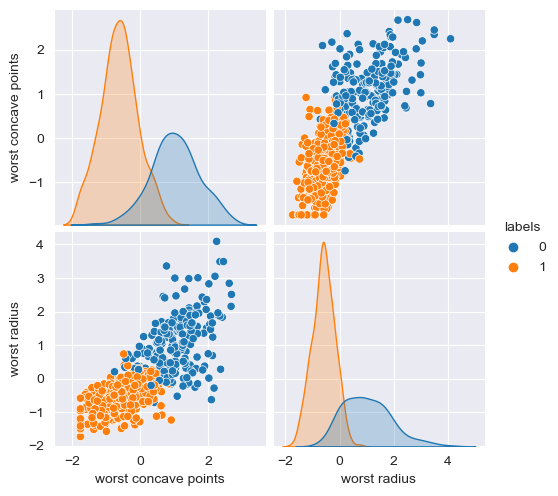

In [7]:
# pair plot ground truth
bc = datasets.load_breast_cancer()
data_std = StandardScaler().fit_transform(bc.data) 

df = pd.DataFrame(data=data_std, columns = bc['feature_names'])
df["labels"] = bc.target

df_sub = df[['worst concave points', 'worst radius', 
              'labels']]
sns.set_style("darkgrid")
sns.pairplot(df_sub,hue="labels")

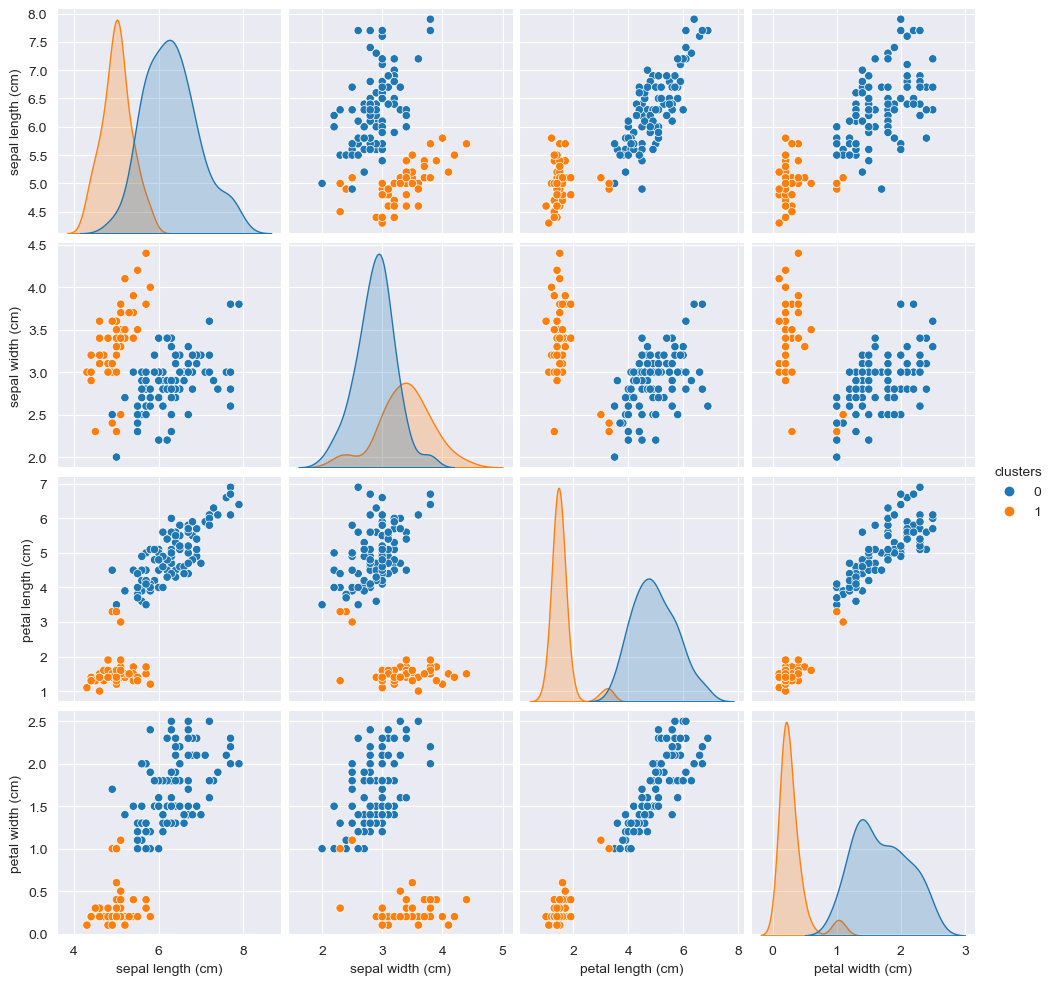

In [20]:
# pair plot K-means cluster N = 2
X, y = datasets.load_iris(return_X_y=True)
km = KMeans(n_clusters=2).fit(X)
labels = km.predict(X)

sns.set_style("darkgrid")
data = datasets.load_iris()
df = pd.DataFrame(data=data['data'], columns = data['feature_names'])
df["clusters"] = labels

sns.set_style("darkgrid")
sns.pairplot(df,hue="clusters")

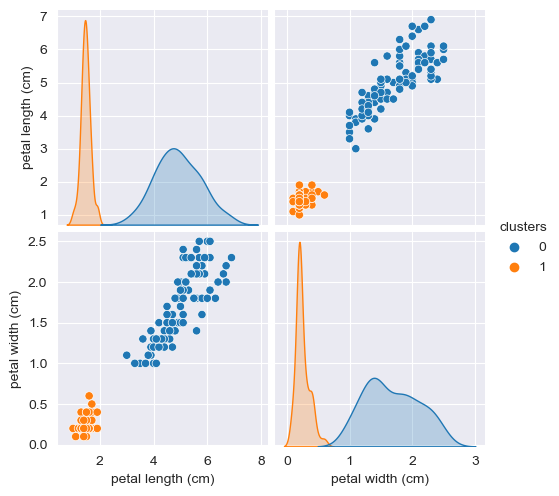

In [9]:
# pair plot GMM cluster N = 2
X, y = datasets.load_iris(return_X_y=True)
gm = GaussianMixture(n_components=2,
                         covariance_type='full').fit(X)
labels = gm.predict(X)

# sns.set_style("darkgrid")
data = datasets.load_iris()
df = pd.DataFrame(data=data['data'], columns = data['feature_names'])
df["clusters"] = labels

df_sub = df[['petal length (cm)',
       'petal width (cm)', 'clusters']]

sns.set_style("darkgrid")
sns.pairplot(df_sub,hue="clusters")

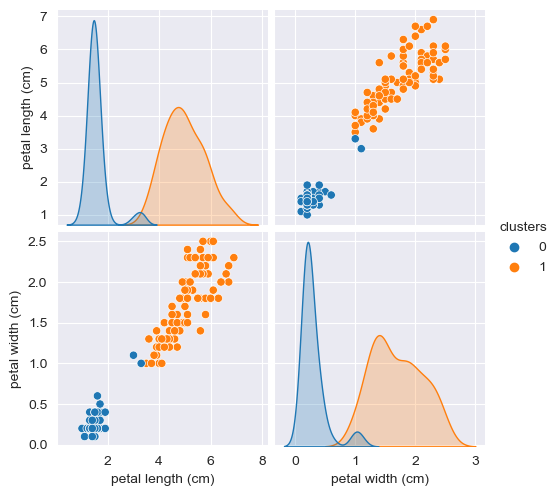

In [10]:
# pair plot K-means cluster N = 2
X, y = datasets.load_iris(return_X_y=True)
km = KMeans(n_clusters=2).fit(X)
labels = km.predict(X)

sns.set_style("darkgrid")
data = datasets.load_iris()
df = pd.DataFrame(data=data['data'], columns = data['feature_names'])
df["clusters"] = labels

df_sub = df[['petal length (cm)',
       'petal width (cm)', 'clusters']]

sns.set_style("darkgrid")
sns.pairplot(df_sub,hue="clusters")

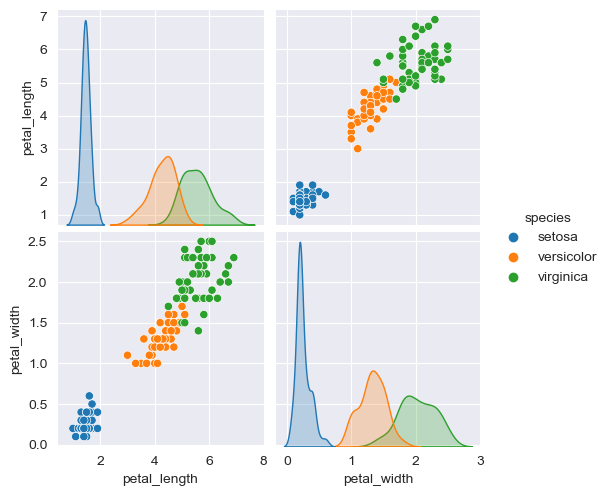

In [22]:
# pair plot iris ground truth
sns.set_style("darkgrid")
iris = sns.load_dataset('iris')
iris_sub = iris[['petal_length',  'petal_width', 'species']]
sns.pairplot(iris_sub, hue="species")

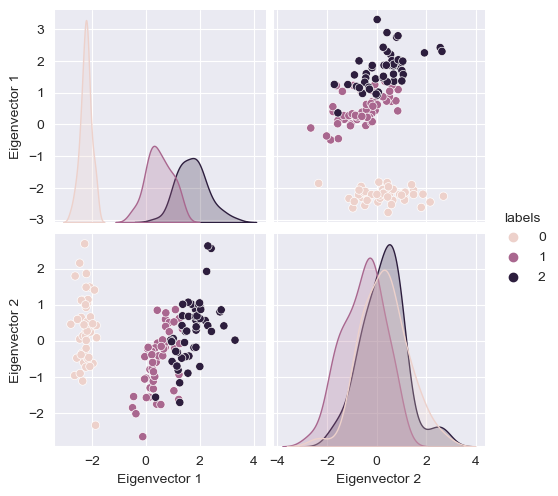

In [28]:
# Iris ground truth PCA
iris = datasets.load_iris()
X,y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_ica = PCA(n_components=2).fit_transform(X)

labels = iris.target
df = pd.DataFrame(data=X_ica,  columns=["Eigenvector 1", "Eigenvector 2"])
df["labels"] = labels


sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

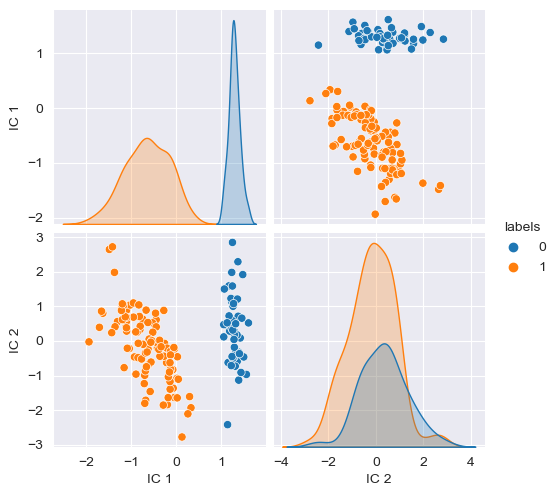

In [21]:
# Iris ICA plots
iris = datasets.load_breast_cancer()
X,y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_ica = FastICA(n_components=3).fit_transform(X)
labels = KMeans(n_clusters=2).fit_predict(X_ica)


df = pd.DataFrame(data=X_ica,  columns=["IC 1", "IC 2"])
df["labels"] = labels


sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

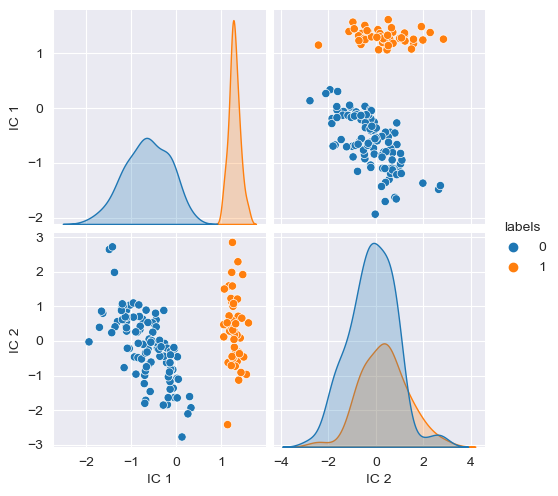

In [20]:
# Iris ICA KM plots
iris = datasets.load_iris()
X,y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_ica = FastICA(n_components=2).fit_transform(X)
labels = GaussianMixture(n_components=2).fit_predict(X_ica)


df = pd.DataFrame(data=X_ica,  columns=["IC 1", "IC 2"])
df["labels"] = labels


sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

<Axes: >

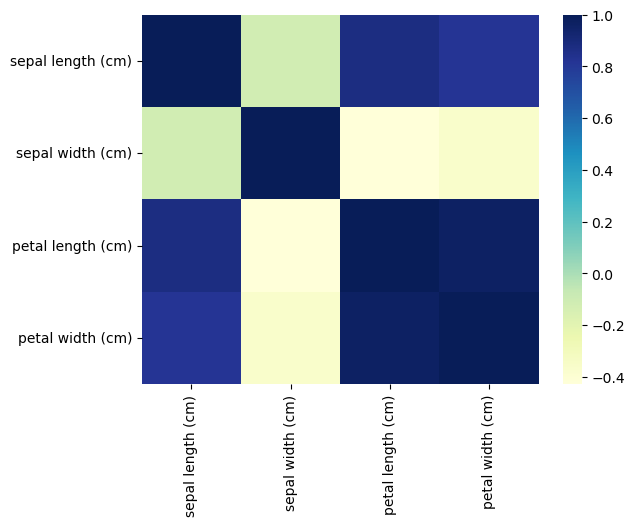

In [10]:
# Correlation coeff heatmap

data = datasets.load_iris()

df = pd.DataFrame(data=data['data'], columns = data['feature_names'])
df.to_csv('iris.txt', sep = ',', index = False)
iris_corr = df.corr()
sns.heatmap(iris_corr, cmap="YlGnBu")

<Axes: >

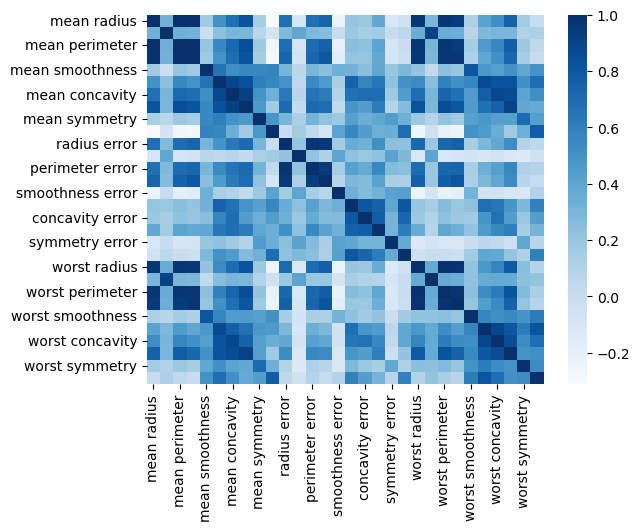

In [14]:
# Correlation coeff heatmap

data = datasets.load_breast_cancer()

df = pd.DataFrame(data=data['data'], columns = data['feature_names'])
df.to_csv('bc.txt', sep = ',', index = False)
bc_corr = df.corr()
sns.heatmap(bc_corr, cmap="Blues")

In [31]:
data = datasets.load_iris()
df = pd.DataFrame(data=data['data'], columns = data['feature_names'])

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = data['feature_names']
vif.sort_values(by=["VIF Factor"], ascending= False)

,VIF Factor,features
0,262.969348,sepal length (cm)
2,172.960962,petal length (cm)
1,96.353292,sepal width (cm)
3,55.502060,petal width (cm)


In [4]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data=data['data'], columns = data['feature_names'])

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = data['feature_names']
vif.sort_values(by=["VIF Factor"],ascending= False)


,VIF Factor,features
0,63306.172036,mean radius
2,58123.586079,mean perimeter
20,9674.742602,worst radius
22,4487.781270,worst perimeter
3,1287.262339,mean area
23,1138.759252,worst area
9,629.679874,mean fractal dimension
29,423.396723,worst fractal dimension
4,393.398166,mean smoothness
24,375.597155,worst smoothness


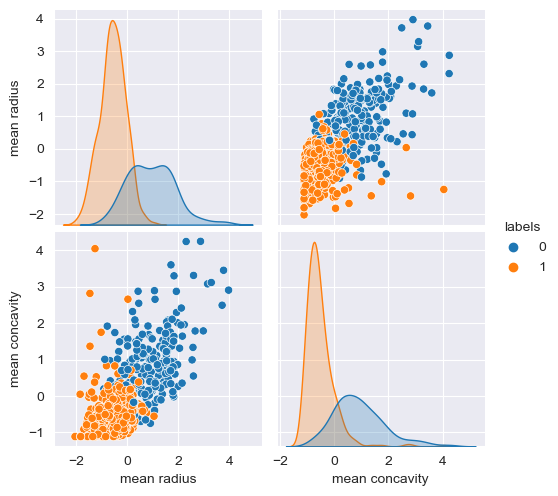

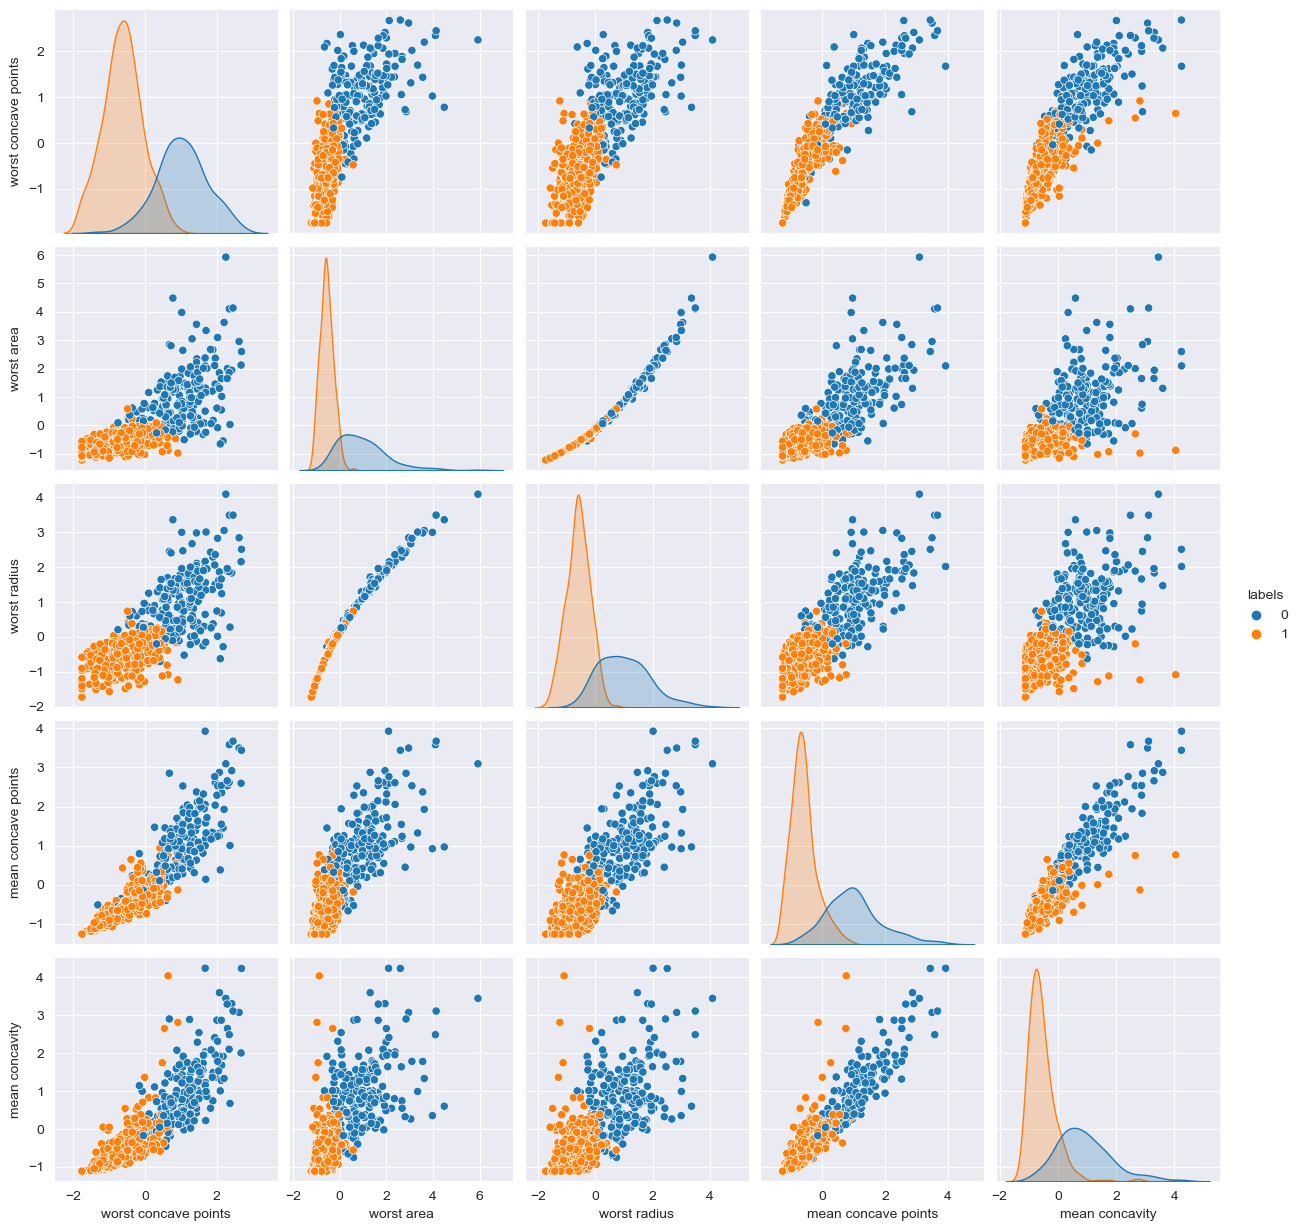

In [17]:
# Cancer pair plot ground truth
bc = datasets.load_breast_cancer()
X, y = datasets.load_breast_cancer(return_X_y=True)
X= StandardScaler().fit_transform(X) 
labels = bc.target

bc = datasets.load_breast_cancer()
data_std = StandardScaler().fit_transform(bc.data) 

df = pd.DataFrame(data=data_std, columns = bc['feature_names'])
df["labels"] = labels

df_sub = df[['worst concave points', 'worst area', 'worst radius', 
             'mean concave points', 'mean concavity', 'labels']]
sns.set_style("darkgrid")
sns.pairplot(df_sub,hue="labels")

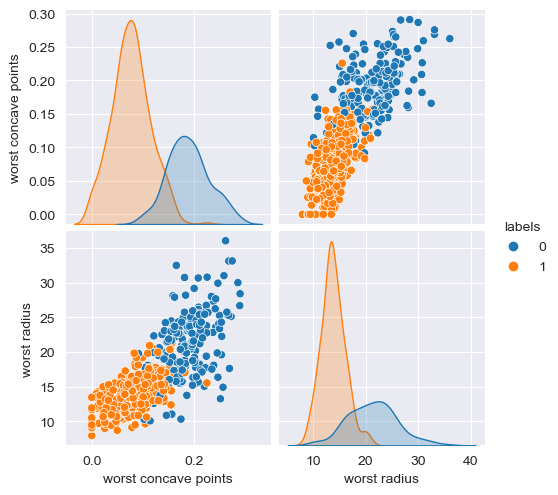

In [79]:
# Cancer pair plot k means  
X, y = datasets.load_breast_cancer(return_X_y=True)
X= StandardScaler().fit_transform(X) 
km = KMeans(n_clusters=2).fit(X)
labels = km.predict(X)

bc = datasets.load_breast_cancer()

df = pd.DataFrame(data=bc.data, columns = bc.feature_names)
df["labels"] = labels

df_sub = df[['worst concave points', 'worst radius', 'labels']]
sns.set_style("darkgrid")
sns.pairplot(df_sub,hue="labels")

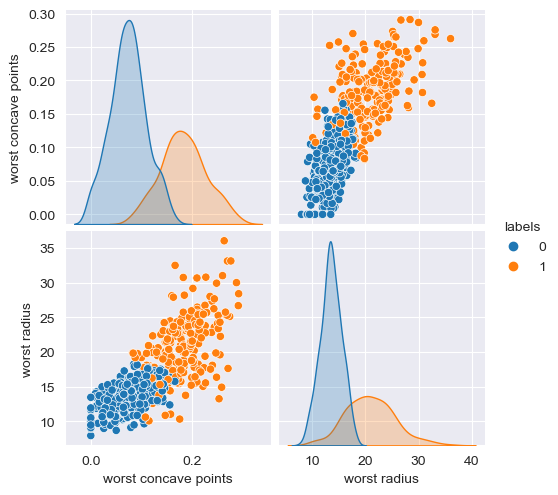

In [80]:
# Cancer pair plot k means  
X, y = datasets.load_breast_cancer(return_X_y=True)
X= StandardScaler().fit_transform(X) 
km = GaussianMixture(n_components=2).fit(X)
labels = km.predict(X)

bc = datasets.load_breast_cancer()

df = pd.DataFrame(data=bc.data, columns = bc.feature_names)
df["labels"] = labels

df_sub = df[['worst concave points', 'worst radius', 'labels']]
sns.set_style("darkgrid")
sns.pairplot(df_sub,hue="labels")

In [12]:
pca.components_[0][3]

0.3582891971515507

In [36]:
# Iris PCA ground truth
X, y = datasets.load_iris(return_X_y=True)
labels = y

df = pd.DataFrame(data=X_pca, columns=["Eigenvector 1", "Eigenvector 2"])
df["labels"] = labels

sns.set_style("darkgrid")
sns.pairplot(df,hue="labels",palette="pastel")

NameError: name 'X_pca' is not defined

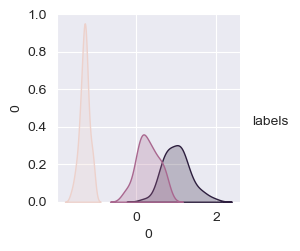

In [4]:
# Iris ICA ground truth
X, y = datasets.load_iris(return_X_y=True)
X= StandardScaler().fit_transform(X) 
X_ica = FastICA(n_components= 1).fit_transform(X)

labels = y

df = pd.DataFrame(data=X_ica)
df["labels"] = labels

sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

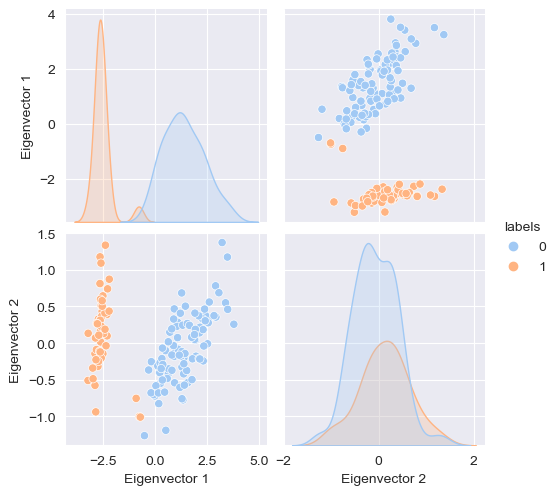

In [27]:
# Iris KM PCA  
labels = KMeans(n_clusters=2).fit_predict(X_pca)
df = pd.DataFrame(data=X_pca,  columns=["Eigenvector 1", "Eigenvector 2"])
df["labels"] = labels


sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

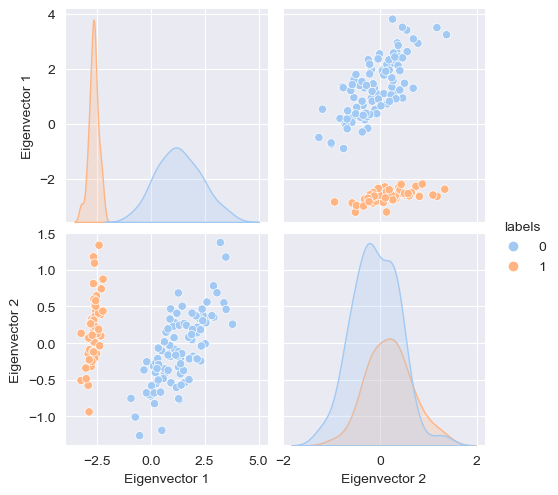

In [30]:
# Iris GMM PCA  

gm = GaussianMixture(n_components=2,covariance_type ='tied', 
                         random_state=np.random.randint(100)).fit(X_pca)
labels = gm.predict(X_pca)

df = pd.DataFrame(data=X_pca,  columns=["Eigenvector 1", "Eigenvector 2"])
df["labels"] = labels

sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

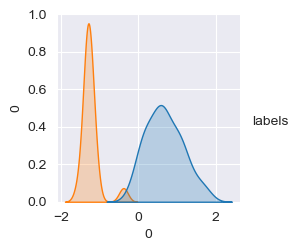

In [14]:
# Iris KM PCA  
X, y = datasets.load_iris(return_X_y=True)
X = FastICA(n_components=1).fit_transform(X)
km = KMeans(n_clusters=2,random_state=np.random.randint(100)).fit(X)
labels = km.predict(X)

df = pd.DataFrame(data=X)
df["labels"] = labels

sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

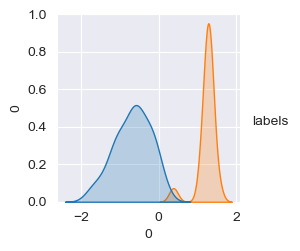

In [13]:
# Iris GMM ICA  
X, y = datasets.load_iris(return_X_y=True)
X = FastICA(n_components=1).fit_transform(X)
gm = GaussianMixture(n_components=2,covariance_type ='tied', 
                         random_state=np.random.randint(100)).fit(X)
labels = gm.predict(X)

df = pd.DataFrame(data=X)
df["labels"] = labels

sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

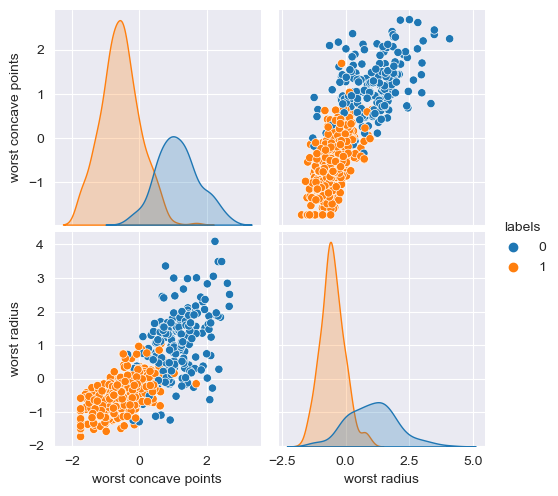

In [23]:
# Cancer pair plot k means  
X, y = datasets.load_breast_cancer(return_X_y=True)
X= StandardScaler().fit_transform(X) 
km = KMeans(n_clusters=2).fit(X)
labels = km.predict(X)

bc = datasets.load_breast_cancer()
data_std = StandardScaler().fit_transform(bc.data) 

df = pd.DataFrame(data=data_std, columns = bc['feature_names'])
df["labels"] = labels

df_sub = df[['worst concave points', 'worst radius', 'labels']]
sns.set_style("darkgrid")
sns.pairplot(df_sub,hue="labels")

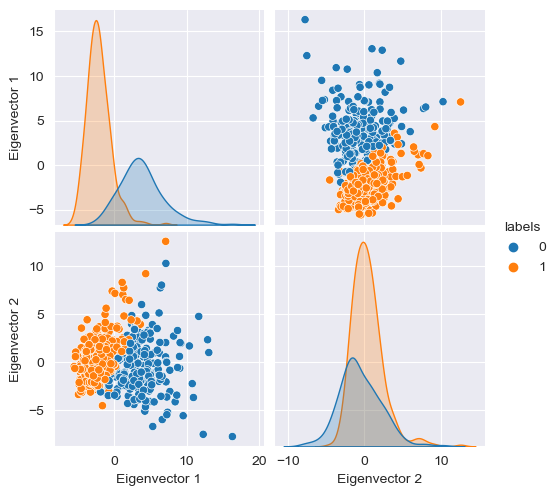

In [16]:
# Cancer ground truth PCA
bc = datasets.load_breast_cancer()
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

labels = bc.target
df = pd.DataFrame(data=X_pca,  columns=["Eigenvector 1", "Eigenvector 2"])
df["labels"] = labels


sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

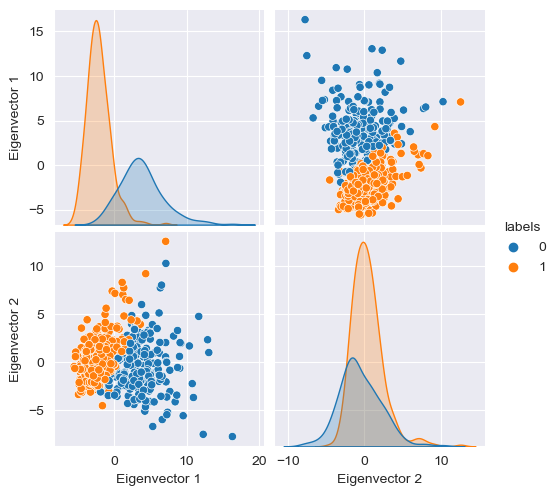

In [24]:
# Cancer ground truth ICA
bc = datasets.load_breast_cancer()
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_ica = FastICA(n_components=2).fit_transform(X)

labels = bc.target
df = pd.DataFrame(data=X_pca,  columns=["Eigenvector 1", "Eigenvector 2"])
df["labels"] = labels


sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

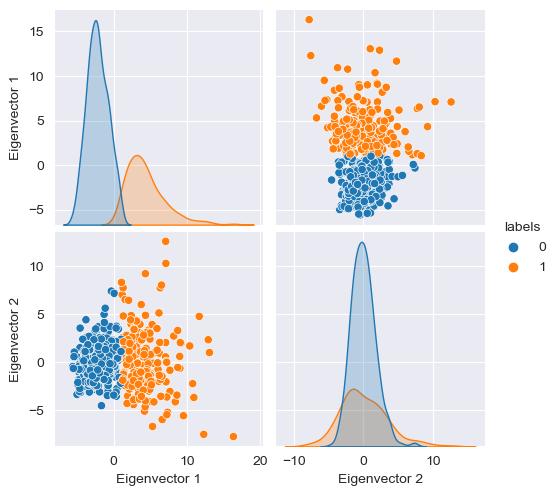

In [14]:
# Cancer KM PCA
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

labels = KMeans(n_clusters=2).fit_predict(X_pca)
df = pd.DataFrame(data=X_pca,  columns=["Eigenvector 1", "Eigenvector 2"])
df["labels"] = labels


sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

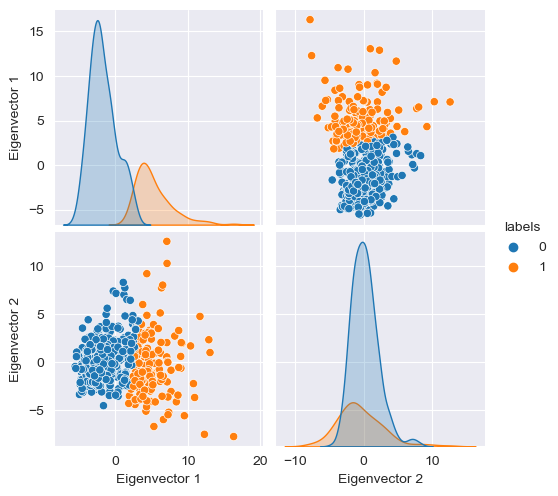

In [15]:
# Cancer GMM PCA
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

labels = GaussianMixture(n_components=2,covariance_type ='tied', 
                         random_state=np.random.randint(100)).fit_predict(X_pca)

df = pd.DataFrame(data=X_pca,  columns=["Eigenvector 1", "Eigenvector 2"])
df["labels"] = labels


sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")

[[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]
[[6.26198886 2.87199642 4.90597719 1.67599129]
 [5.00600639 3.4280142  1.46200203 0.24599932]]


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

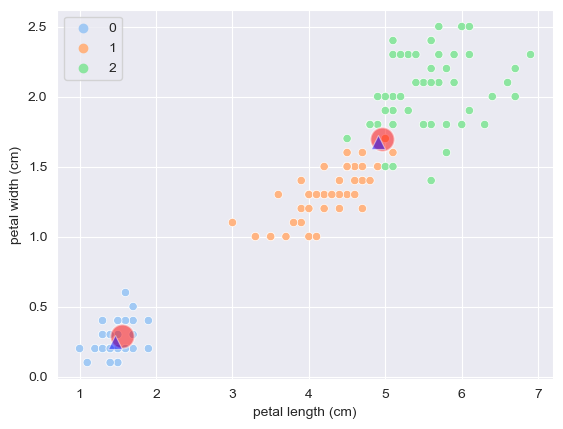

In [13]:
iris = datasets.load_iris() 
X, y = datasets.load_iris(return_X_y=True)
gm = GaussianMixture(n_components=2,covariance_type ='full', 
                         random_state=np.random.randint(100)).fit(X)

km = KMeans(n_clusters=2).fit(X)
labels = y

df = pd.DataFrame(data=X, columns=iris.feature_names)
df["labels"] = labels

colors = {0:"blue", 1:"orange", 2:"green"}

print(km.cluster_centers_)
print(gm.means_)

df_km = pd.DataFrame(data=km.cluster_centers_)
df_gm = pd.DataFrame(data=gm.means_)

#fig, ax = plt.subplots() 
#ax.scatter(df[2], df[3], c=df['labels'].map(colors), alpha=0.5)
#ax.scatter(km.cluster_centers_[0][2], km.cluster_centers_[0][3], c="purple",s=100,alpha=0.8)
#ax.scatter(km.cluster_centers_[1][2], km.cluster_centers_[1][3], c="purple",s=100,alpha=0.8)

sns.set_style("darkgrid")
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue="labels", palette='pastel')
sns.scatterplot(data=df_km, x=2, y=3, c= "red", s=300,alpha=0.5,)
sns.scatterplot(data=df_gm, x=2, y=3, c= "blue", marker="^", s=100,alpha=0.5)

[[1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02]
 [1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02]]
[[1.21625159e+01 1.81117822e+01 7.81751817e+01 4.64129320e+02
  9

<Axes: xlabel='worst concave points', ylabel='worst radius'>

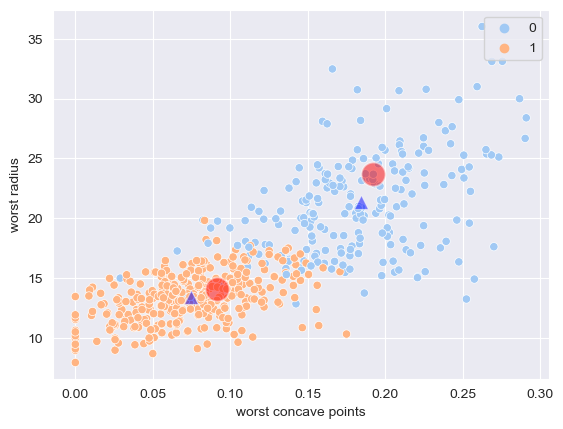

In [22]:
bc = datasets.load_breast_cancer() 
X, y = datasets.load_breast_cancer(return_X_y=True)
gm = GaussianMixture(n_components=2,covariance_type ='full', 
                         random_state=np.random.randint(100)).fit(X)

km = KMeans(n_clusters=2).fit(X)
labels = y

df = pd.DataFrame(data=X, columns=bc.feature_names)
df["labels"] = labels

colors = {0:"blue", 1:"orange"}

print(km.cluster_centers_)
print(gm.means_)

df_km = pd.DataFrame(data=km.cluster_centers_)
df_gm = pd.DataFrame(data=gm.means_)

index1 = bc.feature_names.tolist().index('worst concave points')
index2 = bc.feature_names.tolist().index('worst radius')

#fig, ax = plt.subplots() 
#ax.scatter(df[2], df[3], c=df['labels'].map(colors), alpha=0.5)
#ax.scatter(km.cluster_centers_[0][2], km.cluster_centers_[0][3], c="purple",s=100,alpha=0.8)
#ax.scatter(km.cluster_centers_[1][2], km.cluster_centers_[1][3], c="purple",s=100,alpha=0.8)

sns.set_style("darkgrid")
sns.scatterplot(data=df,x=  'worst concave points', y= 'worst radius',  hue="labels", palette='pastel')
sns.scatterplot(data=df_km, x=index1, y=index2, c= "red", s=300,alpha=0.5,)
sns.scatterplot(data=df_gm, x=index1, y=index2, c= "blue", marker="^", s=100,alpha=0.5)

In [14]:
print() 

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [19]:
print(datasets.load_breast_cancer().feature_names.tolist().index('worst radius'))

20


sil: 0.44997895
ARI: 0.761563677910958
sil: 0.43908945
ARI: 0.7731006996990587


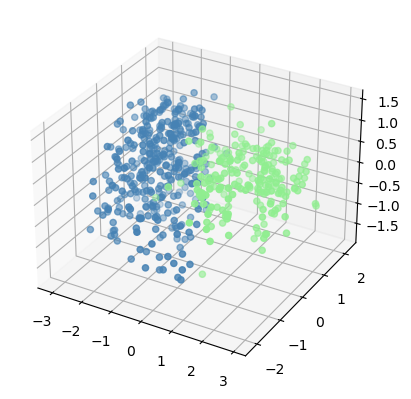

In [7]:
# TSNE low perplexity
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_t = TSNE(n_components=3, perplexity=300).fit_transform(X)

labels = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit_predict(X_t)

print("sil:", metrics.silhouette_score(X_t, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))

labels = GaussianMixture(n_components=2, random_state=np.random.randint(100)).fit_predict(X_t)
print("sil:", metrics.silhouette_score(X_t, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))

df = pd.DataFrame(data=X_t)
df["labels"] = y
df1 = df.loc[df['labels'] == 0]
df2 = df.loc[df['labels'] == 1]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df1[0], df1[1], df1[2], color="lightgreen")
ax.scatter(df2[0], df2[1], df2[2], color="steelblue")

<Axes: xlabel='0', ylabel='1'>

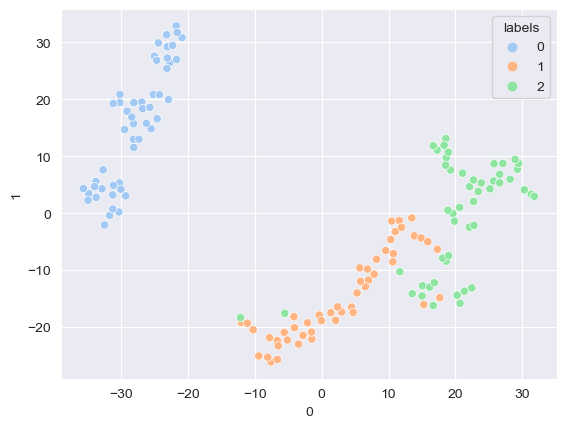

In [14]:
X,y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_t = TSNE(n_components=2, perplexity=10).fit_transform(X)

df = pd.DataFrame(data=X_t)
df["labels"] = y
df1 = df.loc[df['labels'] == 0]
df2 = df.loc[df['labels'] == 1]
df3 = df.loc[df['labels'] == 2]

sns.set_style("darkgrid")
sns.scatterplot(data=df, x=df[0], y=df[1],  hue="labels",palette="pastel")


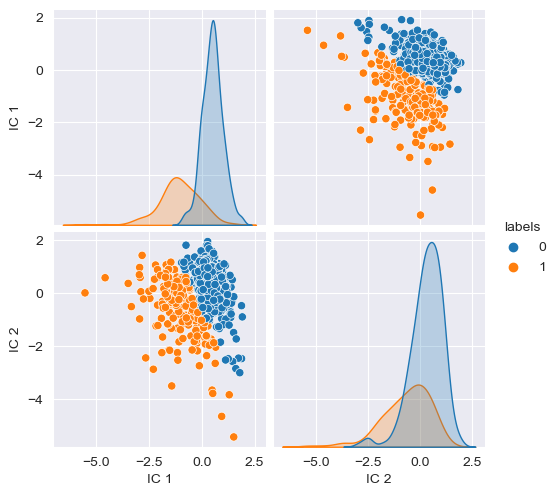

In [24]:
# BC ICA plots
iris = datasets.load_breast_cancer()
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_ica = FastICA(n_components=2).fit_transform(X)
labels = KMeans(n_clusters=2).fit_predict(X_ica)


df = pd.DataFrame(data=X_ica,  columns=["IC 1", "IC 2"])
df["labels"] = labels


sns.set_style("darkgrid")
sns.pairplot(df,hue="labels")